# Steepest Descent

In [ ]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

Here's a function. It's an oblong bowl made of two quadratic functions.

This is pretty much the easiest 2D optimization job out there.

In [ ]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

Let's take a look at the function. First in 3D:

In [ ]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

And then as a "contour plot":

In [ ]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

Next, initialize steepest descent with a starting guess:

In [78]:
guesses = [np.array([2, 2./5])]

Next, run Steepest Descent:

In [95]:
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print(next_guess)

[ 0.00202992 -0.00040598]


Here's some plotting code to illustrate what just happened:

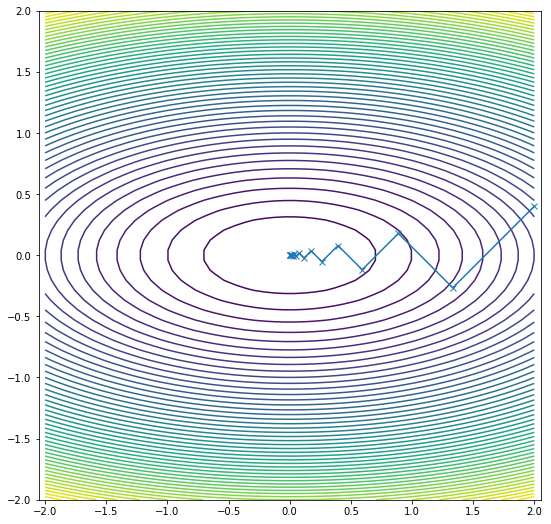

In [96]:
pt.figure(figsize=(9, 9))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

In [ ]:
for i, guess in enumerate(guesses):
    print(i, la.norm(guess, 2))

## Adding in "momentum" / the "heavy ball" method

Steepest descent with added "momentum" term:

$$x_{k+1} = x_k - \alpha \nabla f(x_k) \color{red}{+ \beta (x_{k}-x_{k-1})}$$

In [50]:
guesses = [np.array([2, 2./5])]

# beta = 0.01
#beta = 0.1
beta = 0.5
# beta = 1

Explore different choices of the "momentum parameter" $\beta$ above.

In [76]:
x = guesses[-1]
s = -df(x)

def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s

if len(guesses) >= 2:
    next_guess = next_guess + beta * (guesses[-1] - guesses[-2])

guesses.append(next_guess)

print(next_guess)

[ 0.00048435 -0.00037247]


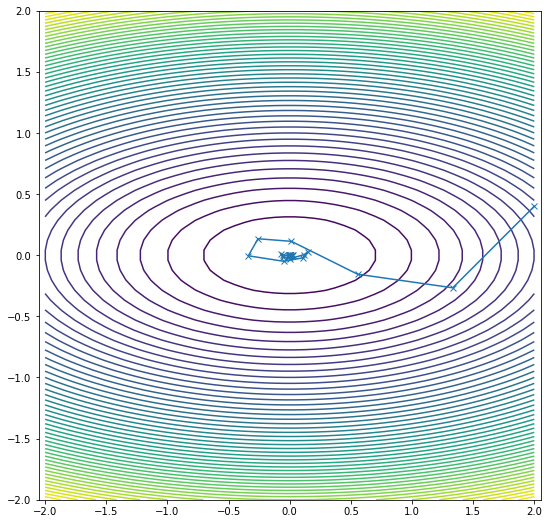

In [77]:
pt.figure(figsize=(9, 9))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

In [ ]:
for i, guess in enumerate(guesses):
    print(i, la.norm(guess, 2))